<a href="https://colab.research.google.com/github/manusmriti31/Sleep-anomality-detector/blob/main/DS_Project_sleep_anomality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep disorder prediction

### 1. Importing the `dataset.csv`

In [6]:
# Step 1: Load the dataset
import pandas as pd
import requests
from pathlib import Path

if Path("dataset.csv").is_file():
  print("Dataset already exists, skipping download")
else:
  print("Downloading helper function....")
  request = requests.get("https://github.com/lisstasy/sleep_disorder_prediction/raw/refs/heads/main/data.csv")
  with open("dataset.csv", "wb") as f:
    f.write(request.content)


# Replace 'your_dataset_link.csv' with the actual link to download the dataset
data = pd.read_csv('dataset.csv')
data.head()
data.info()


Dataset already exists, skipping download
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
mem

### 2. Data Analysis

In [7]:
import pprint

# descriptive statistics
describe_stats = data.describe()

# Unique values in each categorical colum
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in cat_columns:
  unique_values[col] = data[col].unique()

display(describe_stats)

print()
for key, value in unique_values.items():
  print(f"{key}: {value}\n")


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000



Gender: ['Male' 'Female']

Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']

Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']



In [8]:
data['Blood Pressure'][:5]

,Blood Pressure
0,126/83
1,125/80
2,125/80
3,140/90
4,140/90


Key changes in the data
1. In the `BMI category` making sure that the ***Normal Weight*** and the ***Normal*** are merged together
2. In the `Blood Pressure` column would like to seperate the ***systolic*** and ***Diastolic*** into two differnent colums so that the model can leverage the data seperately

In [71]:
# Correcting the inconsistency in 'BMI Category'
data['BMI Category'].replace({'Normal Weight':'Normal'})

# Splitting the 'Blood Pressure' column into 'Systolic' and 'Diastolic' colums
data['Systolic'] = data['Blood Pressure'].str.split('/').str[0].astype(int)
data['Dystolic'] = data['Blood Pressure'].str.split('/').str[1].astype(int)

data = data.drop(['Blood Pressure', 'Person ID'], axis = 1)

### 3. Data Preprocessing

We are converting the named variables i.e `Gender`, `Occupation`, `BMI Category`, and `Sleep Disorder` into numeric format because the machine learning model better understands the numeric inputs

In [ ]:
# installing required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = data.drop(['Sleep Disorder'], axis = 1)
y = data['Sleep Disorder']

# Label encoding for categorical variables in X
label_encoder = {} # To store the encoder objects for potential inverse transformation later

for col in X.select_dtypes(include = ['object']).columns:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])
  label_encoders[col] = le

# Encoding the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X.head(), y[:5]

### 4. Model Building

#### 4.1 Regularization
Inorder to regularize the numeric features as the model better understands the regularized data in a much better way.

Thus we are applying `StandardScaler()` to the numeric fetures for the regularization purpose

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 42)

# Applying Standard to Numeric variables
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
# y_train_scaled = y_train.copy()
# y_test_scaled = y_test.copy()

# List of key numerical variables
num_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.fit_transform(X_test[num_vars])
# y_train_scaled[num_vars] = scaler.fit_transform(y_train[num_vars])
# y_test_scaled[num_vars] = scaler.fit_transform(y_test[num_vars])

In [ ]:
data[:5]

#### 4.2 Trainig Function
We will train the model on the training data with `cross-validation`. As cross-validation provides an estimate of the model's performance based on multiple splits of the training data, which is more robust because it reduces the risk that the model is only tuned to a specific portion of the data

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Function to train and validate models
def train_and_cross_validate(model, X_train, y_train, cv = 5):
  """
  Function to train the models using cross-validation and return the average score
  """

  scores = cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring='f1_weighted')

  print(f"{model.__class__.__name__} Cross-Validation F1_weighted: {np.mean(scores):.2f} +/- {np.std(scores):.2f}")
  model.fit(X_train, y_train)
  return model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()

In [77]:
scores = train_and_cross_validate(model1, X_train_scaled, y_train)

RandomForestClassifier Cross-Validation F1_weighted: 0.89 +/- 0.04


In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def evaluate_and_plot_confusion_matrix(model, X_train, y_train, X_test, y_test, class_names):
  """
  Plot the confusion matrix.
  """

  # Plot confusion matrix
  # fig, ax = plt.plot(figsize=(10, 8))
  y_pred = model.predict(X_test)
  disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=class_names)
  disp.plot(cmap=plt.cm.Blues)
  disp.im_.colorbar.remove()

  # Set the title for the confusion matrix within the figure (using ax)
  plt.title(f"{model.__class__.__name__} Confusion Matrix")

  plt.show()  # Display the plot

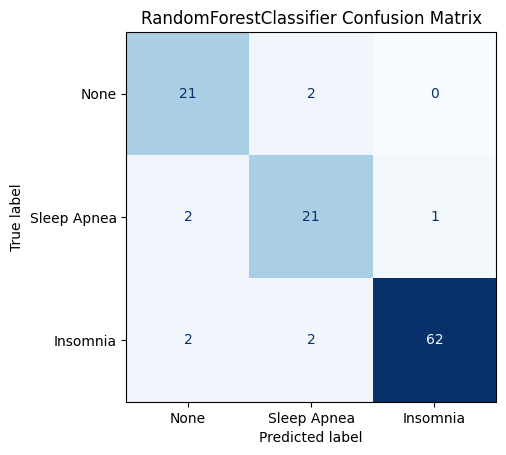

In [79]:
class_names = ['None', 'Sleep Apnea', 'Insomnia']

evaluate_and_plot_confusion_matrix(model1, X_train_scaled, y_train, X_test_scaled, y_test, class_names)

In [82]:
import joblib

# Save the label encoders and scaler
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(le_target, 'target_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [85]:
import joblib
import pandas as pd

# Load the saved encoders and scaler
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('scaler.pkl')

# Define class names for mapping predictions
class_names = ['None', 'Sleep Apnea', 'Insomnia']

def predict_sleep_disorder(input_data):

    input_df = pd.DataFrame([input_data])

    if 'Person ID' not in input_df.columns:
        input_df['Person ID'] = 0

    # Ensure the input data has the same columns as the training data, in the same order
    training_columns = ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
                        'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
                        'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic', 'Dystolic']
    input_df = input_df.reindex(columns=training_columns, fill_value=0)


    for col in label_encoders:
        if col in input_df.columns:
            input_df[col] = label_encoders[col].transform(input_df[col])

    num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Dystolic']
    input_df[num_vars] = scaler.transform(input_df[num_vars])

    # Drop unnecessary columns (e.g., 'Person ID')
    input_df = input_df.drop(['Person ID'], axis=1)

    # print("Preprocessed Input Data:")
    # print(input_df)

    prediction = model1.predict(input_df)
    # print(f"Raw Prediction: {prediction}")

    predicted_label = class_names[prediction[0]]

    return predicted_label

# Example usage:
input_data = {
    'Gender': 'Male',
    'Age': 30,
    'Occupation': 'Software Engineer',
    'Sleep Duration': 7.5,
    'Quality of Sleep': 8,
    'Physical Activity Level': 5000,
    'Stress Level': 5,
    'BMI Category': 'Normal',
    'Heart Rate': 70,
    'Daily Steps': 8000,
    'Systolic': 120,
    'Dystolic': 80
}

predicted_disorder = predict_sleep_disorder(input_data)
print(f"Predicted Sleep Disorder: {predicted_disorder}")

Predicted Sleep Disorder: Insomnia


In [86]:
def get_user_input():
    input_data = {}
    input_data['Gender'] = input("Enter Gender (Male/Female): ")
    input_data['Age'] = int(input("Enter Age: "))
    input_data['Occupation'] = input("Enter Occupation: ")
    input_data['Sleep Duration'] = float(input("Enter Sleep Duration (hours): "))
    input_data['Quality of Sleep'] = int(input("Enter Quality of Sleep (1-10): "))
    input_data['Physical Activity Level'] = int(input("Enter Physical Activity Level (steps): "))
    input_data['Stress Level'] = int(input("Enter Stress Level (1-10): "))
    input_data['BMI Category'] = input("Enter BMI Category (Normal/Overweight/Obese): ")
    input_data['Heart Rate'] = int(input("Enter Heart Rate (bpm): "))
    input_data['Daily Steps'] = int(input("Enter Daily Steps: "))
    input_data['Systolic'] = int(input("Enter Systolic Blood Pressure: "))
    input_data['Dystolic'] = int(input("Enter Diastolic Blood Pressure: "))
    input_data['Person ID'] = 0  # Placeholder for 'Person ID'
    return input_data

# Get user input
user_input = get_user_input()

# Predict and display the result
predicted_disorder = predict_sleep_disorder(user_input)
print(f"Predicted Sleep Disorder: {predicted_disorder}")

Enter Gender (Male/Female): Male
Enter Age: 18
Enter Occupation: Doctor
Enter Sleep Duration (hours): 3
Enter Quality of Sleep (1-10): 4
Enter Physical Activity Level (steps): 5000
Enter Stress Level (1-10): 10
Enter BMI Category (Normal/Overweight/Obese): Obese
Enter Heart Rate (bpm): 77
Enter Daily Steps: 5000
Enter Systolic Blood Pressure: 120
Enter Diastolic Blood Pressure: 80
Predicted Sleep Disorder: Insomnia
